In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
cd C:\Users\savig\OneDrive\Desktop\MachineLearningAlgorithms

C:\Users\savig\OneDrive\Desktop\MachineLearningAlgorithms


In [6]:
## read dataset
df_index=pd.read_csv('indexprice.csv')

In [14]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployement_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.6,1256


In [16]:
## drop not needed column
df_index=df_index.drop(columns=["Unnamed: 0","year","month"],axis=1)

In [18]:
df_index.head()

,interest_rate,unemployement_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.6,1256


In [19]:
## check null values
df_index.isnull().sum()

interest_rate         0
unemployement_rate    0
index_price           0
dtype: int64

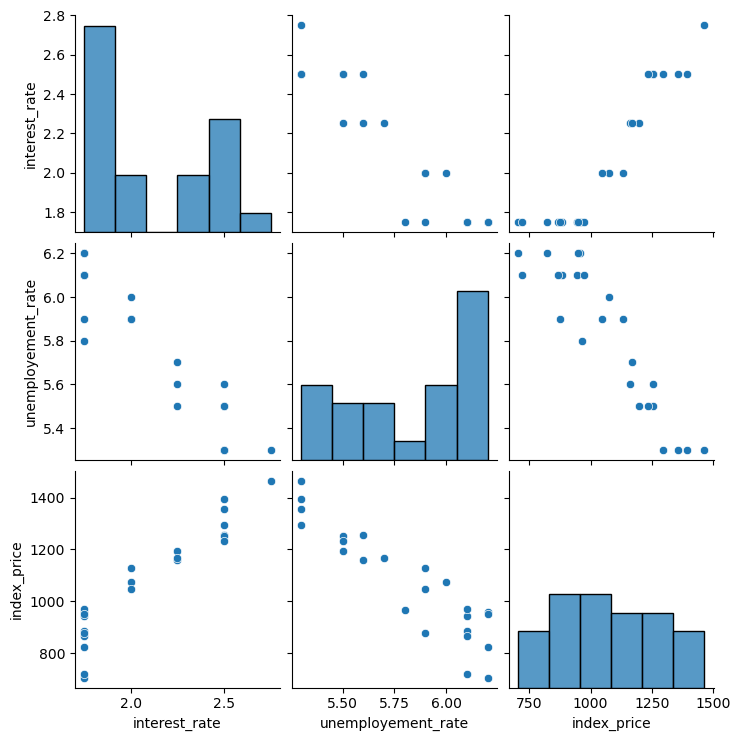

In [20]:
## visualisation
import seaborn as sns
sns.pairplot(df_index)

In [21]:
df_index.corr()

,interest_rate,unemployement_rate,index_price
interest_rate,1.000000,-0.935890,0.935793
unemployement_rate,-0.935890,1.000000,-0.912951
index_price,0.935793,-0.912951,1.000000


Text(0, 0.5, 'unemployement rate')

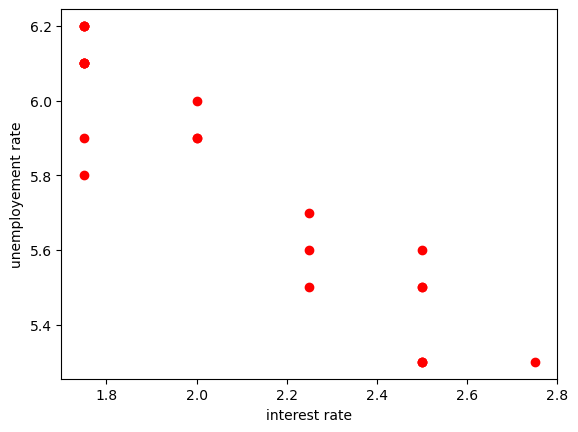

In [25]:
##  we see inverse relation between interest and unemployment
plt.scatter(df_index['interest_rate'],df_index['unemployement_rate'],color='r')
plt.xlabel("interest rate")
plt.ylabel("unemployement rate")

<Axes: xlabel='interest_rate', ylabel='index_price'>

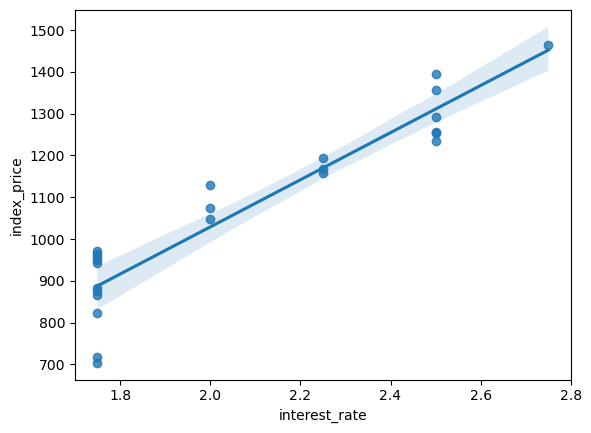

In [35]:
## seaborn helps in showing linear regression model fit - only used for 2 features

data=df_index

sns.regplot(x = "interest_rate",
            y = "index_price",
           data=data)

<Axes: xlabel='unemployement_rate', ylabel='index_price'>

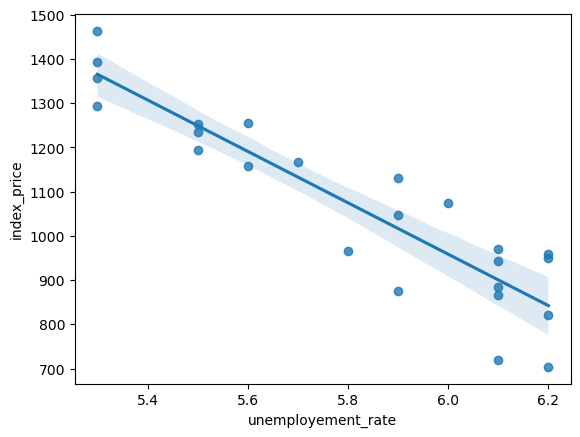

In [36]:
data=df_index

sns.regplot(x = "unemployement_rate",
            y = "index_price",
           data=data)

In [46]:
## independent and dependent features
X=df_index.iloc[:,:-1]

In [53]:
X

,interest_rate,unemployement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.6
5,2.50,5.5
6,2.50,5.5
7,2.25,5.5
8,2.25,5.6
9,2.25,5.7


In [51]:
y=df_index.iloc[:,-1]

In [52]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [28]:
X.head()

,interest_rate,unemployement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.6


In [29]:
y.head()

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [58]:
## train , test, split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [59]:
## std scaler
from sklearn.preprocessing import StandardScaler


In [60]:
scaler=StandardScaler()

In [61]:
X_train=scaler.fit_transform(X_train)

In [62]:
X_train

array([[-0.90115511, -0.03335187],
       [ 1.31077107, -1.5341859 ],
       [-0.90115511,  1.16731536],
       [ 1.31077107, -0.93385228],
       [ 1.31077107, -1.5341859 ],
       [-0.16384638,  0.26681494],
       [-0.90115511,  1.16731536],
       [ 1.31077107, -1.5341859 ],
       [ 1.31077107, -0.63368548],
       [-0.90115511,  1.16731536],
       [-0.90115511,  1.16731536],
       [-0.90115511,  0.26681494],
       [-0.90115511,  0.86714855],
       [ 0.57346234, -0.93385228],
       [-0.16384638,  0.26681494],
       [-0.90115511,  0.86714855],
       [-0.90115511,  0.86714855],
       [ 1.31077107, -0.93385228]])

In [91]:
X_test

,interest_rate,unemployement_rate
8,2.25,5.6
16,1.75,6.1
0,2.75,5.3
18,1.75,6.1
11,2.00,6.0
9,2.25,5.7


In [92]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [93]:
regression.fit(X_train,y_train)

LinearRegression()

In [94]:
############optional 
## cross val score- it is a cross valudation method - 
## creates a cross val model based on model,X train,y train,scoring param, cv value= how many iterations of cross validation
## we will have mse=mean squared error values =3 as cv=3 and so we will comput mean
from sklearn.model_selection import cross_val_score

In [95]:
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [96]:
mean_of_mse=np.mean(validation_score)

In [97]:
mean_of_mse

-6664.086832200975

In [98]:
### prediction
y_pred=regression.predict(X_test)


C:\Users\savig\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [99]:
y_pred

array([863.30913578, 762.95970609, 947.30932364, 762.95970609,
       800.87248955, 855.13451486])

In [100]:
#### performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [101]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

97456.63861177229
287.9091873326574
312.18045840790916


In [102]:
## R square and adjusted r sq

from sklearn.metrics import r2_score

In [103]:
r2score=r2_score(y_test,y_pred)
adjustedRsq=1-(1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r2score)
print(adjustedRsq)

-1.8949236175942814
-3.824872695990469


## Assumptions to check model performed well

1. check scatter plt of y_test ; y_ pred - if linear ie model is performing well
2. calculate residual between y_test and y_pred ; plot them with help of dish plot; if curve is normal dist- means model is good
3. scttaer plot w.r.t pred and residuals; if data is uniformly distributed - then model is good

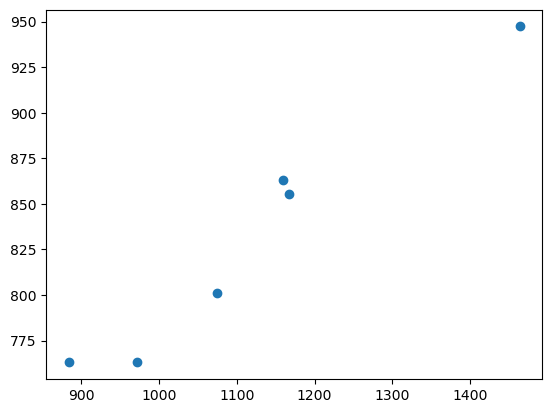

In [104]:
plt.scatter(y_test,y_pred)

In [105]:
residuals=y_test-y_pred
print(residuals)

8     295.690864
16    208.040294
0     516.690676
18    121.040294
11    274.127510
9     311.865485
Name: index_price, dtype: float64


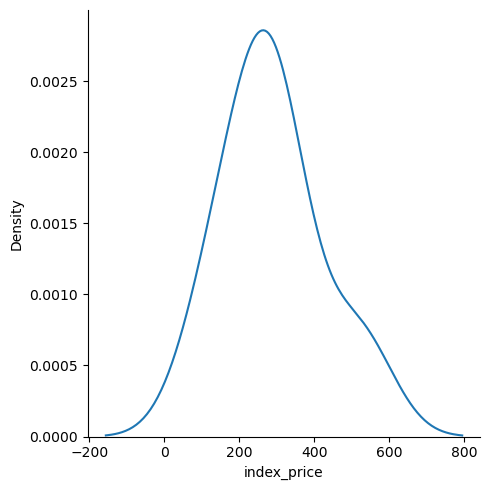

In [106]:
sns.displot(residuals,kind='kde')

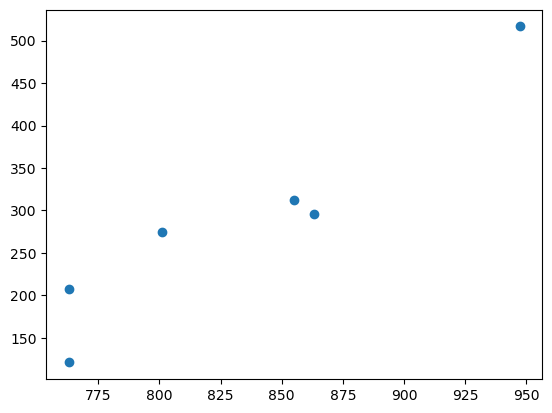

In [108]:
plt.scatter(y_pred,residuals)

In [109]:
### OLS Regression model
import statsmodels.api as sm

In [110]:
model=sm.OLS(y_train,X_train).fit()

In [111]:
prediction2 = model.predict(X_test)
print(prediction2)

8    -190.135309
16   -290.484738
0    -106.135121
18   -290.484738
11   -252.571955
9    -198.309930
dtype: float64


In [112]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):             -0.087
Method:                 Least Squares   F-statistic:                             0.2788
Date:                Wed, 03 Jul 2024   Prob (F-statistic):                       0.760
Time:                        16:21:37   Log-Likelihood:                         -150.86
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\savig\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [113]:
##print coef for model and compare from above
print(regression.coef_)

[118.95265018 -81.74620921]


In [ ]:
## both coef are same that means our model is good.